<a href="https://colab.research.google.com/github/Hammadtahir7/Card-Fraud-Detection/blob/master/CCFD_SCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SCD.csv to SCD.csv


In [3]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['SCD.csv']),header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,100.0,3000.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0
1,100.0,4300.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0
2,185.5,4823.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0
3,185.5,5008.5,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0
4,500.0,26000.0,0.0,0.0,1.0,1.0,800.0,677.2,6.0,1.0


In [4]:
df2[df2.columns[9]].value_counts()

0.0    2627
1.0     448
Name: 9, dtype: int64

In [0]:
features =df2.drop(df2.columns[9],axis=1)
labels=df2[df2.columns[9]]


In [6]:
import numpy as np
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[   0    1]
 [2627  448]]


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
features = scaler.fit_transform(features)
print(features[0])

X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.2, random_state=42)

#X_train=X_train.astype('float32')
#X_test=X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[-1.42200799 -0.67856862 -0.13742882  1.84422371  1.83180896  3.74165739
 -0.26978337 -0.25664688 -0.25310881]
(2460, 9)
(615, 9)
(2460,)
(615,)


In [8]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [512 103]]


In [9]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()

In [0]:
from sklearn import svm
model_svm = svm.SVC(probability=True)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1,9)))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_ann=Sequential()
model_ann.add(Dense(200,input_shape=(9,),activation='relu'))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

model_1dcnn = Sequential()
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1,9)))
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model_1dcnn.add(Dropout(0.5))
model_1dcnn.add(MaxPooling1D(pool_size=1))
model_1dcnn.add(Flatten())
model_1dcnn.add(Dense(100, activation='relu'))
model_1dcnn.add(Dense(1, activation='sigmoid'))
model_1dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [17]:
model_lstm.fit(X_train.reshape(2460,1,9), y_train, validation_data=(X_test.reshape(615,1,9), y_test), epochs=10)




Train on 2460 samples, validate on 615 samples
Epoch 1/10





2460/2460 [==============================] - 2s 640us/step - loss: 0.6071 - acc: 0.8972 - val_loss: 0.5083 - val_acc: 0.9480
Epoch 2/10
2460/2460 [==============================] - 0s 98us/step - loss: 0.3870 - acc: 0.9622 - val_loss: 0.2730 - val_acc: 0.9577
Epoch 3/10
2460/2460 [==============================] - 0s 97us/step - loss: 0.1952 - acc: 0.9699 - val_loss: 0.1510 - val_acc: 0.9642
Epoch 4/10
2460/2460 [==============================] - 0s 101us/step - loss: 0.1153 - acc: 0.9740 - val_loss: 0.1079 - val_acc: 0.9707
Epoch 5/10
2460/2460 [==============================] - 0s 105us/step - loss: 0.0858 - acc: 0.9756 - val_loss: 0.0903 - val_acc: 0.9756
Epoch 6/10
2460/2460 [==============================] - 0s 104us/step - loss: 0.0715 - acc: 0.9789 - val_loss: 0.0801 - val_acc: 0.9707
Epoch 7/10
2460/2460 [==============================] - 0s 96us/step - loss: 0.0624 - acc: 0.9805 - val_loss: 0.0734 - val_acc: 0.9

In [20]:
model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 2460 samples, validate on 615 samples
Epoch 1/10
2460/2460 [==============================] - 1s 224us/step - loss: 0.3179 - acc: 0.9455 - val_loss: 0.1467 - val_acc: 0.9707
Epoch 2/10
2460/2460 [==============================] - 0s 47us/step - loss: 0.1027 - acc: 0.9744 - val_loss: 0.0873 - val_acc: 0.9740
Epoch 3/10
2460/2460 [==============================] - 0s 53us/step - loss: 0.0708 - acc: 0.9797 - val_loss: 0.0726 - val_acc: 0.9772
Epoch 4/10
2460/2460 [==============================] - 0s 49us/step - loss: 0.0571 - acc: 0.9833 - val_loss: 0.0639 - val_acc: 0.9789
Epoch 5/10
2460/2460 [==============================] - 0s 48us/step - loss: 0.0491 - acc: 0.9866 - val_loss: 0.0577 - val_acc: 0.9789
Epoch 6/10
2460/2460 [==============================] - 0s 46us/step - loss: 0.0439 - acc: 0.9874 - val_loss: 0.0555 - val_acc: 0.9805
Epoch 7/10
2460/2460 [==============================] - 0s 51us/step - loss: 0.0392 - acc: 0.9878 - val_loss: 0.0526 - val_acc: 0.9789
Epoch 8

In [21]:
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
model_1dcnn.fit(X_train.reshape(2460,1,9), y_train, validation_data=(X_test.reshape(615,1,9), y_test), epochs=10)

Train on 2460 samples, validate on 615 samples
Epoch 1/10
2460/2460 [==============================] - 1s 339us/step - loss: 0.3003 - acc: 0.9016 - val_loss: 0.0871 - val_acc: 0.9691
Epoch 2/10
2460/2460 [==============================] - 0s 59us/step - loss: 0.0834 - acc: 0.9687 - val_loss: 0.0643 - val_acc: 0.9756
Epoch 3/10
2460/2460 [==============================] - 0s 62us/step - loss: 0.0620 - acc: 0.9772 - val_loss: 0.0568 - val_acc: 0.9805
Epoch 4/10
2460/2460 [==============================] - 0s 72us/step - loss: 0.0485 - acc: 0.9833 - val_loss: 0.0532 - val_acc: 0.9837
Epoch 5/10
2460/2460 [==============================] - 0s 60us/step - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0508 - val_acc: 0.9886
Epoch 6/10
2460/2460 [==============================] - 0s 63us/step - loss: 0.0360 - acc: 0.9882 - val_loss: 0.0599 - val_acc: 0.9756
Epoch 7/10
2460/2460 [==============================] - 0s 61us/step - loss: 0.0434 - acc: 0.9870 - val_loss: 0.0450 - val_acc: 0.9870
Epoch 8

In [0]:
y_pred_svm=model_svm.predict(X_test)
y_pred_rf=model_rf.predict(X_test)
y_pred_1dcnn=model_1dcnn.predict_classes(X_test.reshape(615,1,9))
y_pred_lstm=model_lstm.predict_classes(X_test.reshape(615,1,9))
y_pred_ann=model_ann.predict_classes(X_test)

In [26]:
unique_elements, counts_elements = np.unique(y_pred_1dcnn, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [512 103]]


In [28]:
y_pred=model_lstm.predict_classes(X_test.reshape(615,1,9))
y_pred=np.append(y_pred,model_ann.predict_classes(X_test),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X_test).reshape(615,1),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X_test).reshape(615,1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X_test.reshape(615,1,9)),axis=1)
print(y_pred.shape)

(615, 5)


In [0]:
header=['LSTM','ANN','SVM','RF','1DCNN']

In [32]:
from sklearn import metrics

for x in range (len(y_pred[0])):
  print(header[x])
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred[:,x])))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y_test, y_pred[:,x])))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y_test, y_pred[:,x])))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y_test,y_pred[:,x])))
  print(metrics.confusion_matrix(y_test,y_pred[:,x]))
  print("-----------")

LSTM
Accuracy: 97.72%
Precision: 93.20%
Recall: 93.20%
F1: 93.20%
[[505   7]
 [  7  96]]
-----------
ANN
Accuracy: 98.54%
Precision: 96.08%
Recall: 95.15%
F1: 95.61%
[[508   4]
 [  5  98]]
-----------
SVM
Accuracy: 97.89%
Precision: 93.27%
Recall: 94.17%
F1: 93.72%
[[505   7]
 [  6  97]]
-----------
RF
Accuracy: 98.21%
Precision: 96.94%
Recall: 92.23%
F1: 94.53%
[[509   3]
 [  8  95]]
-----------
1DCNN
Accuracy: 98.70%
Precision: 96.12%
Recall: 96.12%
F1: 96.12%
[[508   4]
 [  4  99]]
-----------


In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

lr_probs_svm = model_svm.predict_proba(X_test)[:,1]
lr_probs_rf =model_rf.predict_proba(X_test)[:,1]
lr_probs_lstm=model_lstm.predict_proba(X_test.reshape(615,1,9)).reshape(615)
lr_probs_1dcnn=model_1dcnn.predict_proba(X_test.reshape(615,1,9)).reshape(615)
lr_probs_ann=model_ann.predict_proba(X_test).reshape(615)


In [34]:
lr_precision_svm, lr_recall_svm, _ = precision_recall_curve(y_test, lr_probs_svm)
lr_f1_svm, lr_auc_svm = f1_score(y_test, y_pred_svm), auc(lr_recall_svm, lr_precision_svm)

lr_precision_rf, lr_recall_rf, _ = precision_recall_curve(y_test, lr_probs_rf)
lr_f1_rf, lr_auc_rf = f1_score(y_test, y_pred_rf), auc(lr_recall_rf, lr_precision_rf)

lr_precision_lstm, lr_recall_lstm, _ = precision_recall_curve(y_test, lr_probs_lstm)
lr_f1_lstm, lr_auc_lstm = f1_score(y_test, y_pred_lstm), auc(lr_recall_lstm, lr_precision_lstm)

lr_precision_1dcnn, lr_recall_1dcnn, _ = precision_recall_curve(y_test, lr_probs_1dcnn)
lr_f1_1dcnn, lr_auc_1dcnn = f1_score(y_test, y_pred_1dcnn), auc(lr_recall_1dcnn, lr_precision_1dcnn)

lr_precision_ann, lr_recall_ann, _ = precision_recall_curve(y_test, lr_probs_ann)
lr_f1_ann, lr_auc_ann = f1_score(y_test, y_pred_ann), auc(lr_recall_ann, lr_precision_ann)

print("{:.2%}".format(lr_f1_ann))
print("{:.2%}".format(lr_auc_ann))

95.61%
98.98%


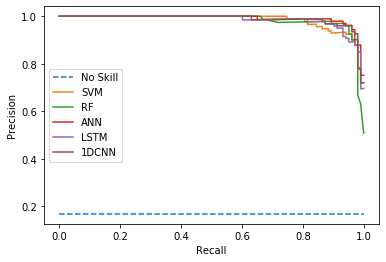

<Figure size 2880x2880 with 0 Axes>

In [36]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall_svm, lr_precision_svm, 'C1', label='SVM')
pyplot.plot(lr_recall_rf, lr_precision_rf, 'C2', label='RF')
pyplot.plot(lr_recall_ann, lr_precision_ann, 'C3', label='ANN')
pyplot.plot(lr_recall_lstm, lr_precision_lstm, 'C4', label='LSTM')
pyplot.plot(lr_recall_1dcnn, lr_precision_1dcnn, 'C5', label='1DCNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
pyplot.figure(figsize=(40,40))
# show the plot
pyplot.show()


In [0]:
y_pred=model_lstm.predict_classes(X_test.reshape(1083,1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X_test.reshape(1083,5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X_test),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X_test).reshape(1083,1),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X_test).reshape(1083,1),axis=1)
print(y_pred.shape)

(1083, 5)


In [0]:
import statistics
y=[]
for rows in y_pred:
  y=np.append(y,statistics.mode(rows))

In [0]:
y_pred=y.reshape(1083,1)
print(y_pred.shape)

(1083, 1)


In [0]:
from sklearn import metrics
print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred)));
print("Precision: "+"{:.2%}".format(metrics.precision_score(y_test, y_pred)));
print("Recall: "+"{:.2%}".format(metrics.recall_score(y_test, y_pred)));
print("F1: "+"{:.2%}".format(metrics.f1_score(y_test,y_pred)));
print(metrics.confusion_matrix(y_test,y_pred));

Accuracy: 99.08%
Precision: 98.82%
Recall: 90.32%
F1: 94.38%
[[989   1]
 [  9  84]]
